In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from spectral import *
import numpy as np
import PIL
import sympy as sp
from mpmath import *
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#img = aviris.open('f970619t01p02_r02_sc05.a.rfl','f970619t01p02_r02.a.spc')
img = aviris.open('hawaii_sc01.raw')

In [4]:
from skimage.measure import structural_similarity as ssim
from skimage import color

s = ssim(imageA, imageB)

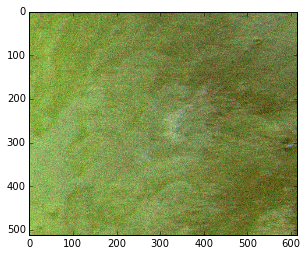

In [5]:
view = imshow(img, (1,2,200))

In [6]:
arr = img.load()

In [7]:
block = []
for i in range(224):
    data = arr[:40,:40,i].astype(np.float32)*10000 
    block.append(data)

In [8]:
corr1 = []
for i in range(223):
    cor = ssim(block[i], block[i+1])
    corr1.append(cor)

In [9]:
len(corr1)

223

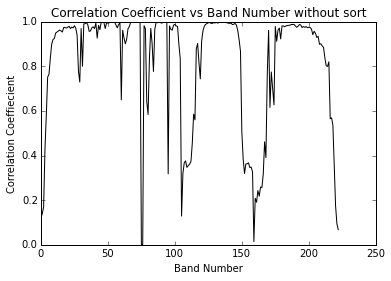

In [10]:
plt.figure(17)
plt.plot(range(0,223),corr1, 'k')
plt.xlabel('Band Number')
plt.ylabel('Correlation Coeffiecient')
plt.title('Correlation Coefficient vs Band Number without sort')
plt.show()

In [11]:
def swap(i, j):                    
    sqc[i], sqc[j] = sqc[j], sqc[i] 

def heapify(end,i):   
    l=2 * i + 1  
    r=2 * (i + 1)   
    max=i   
    if l < end and sqc[i] < sqc[l]:   
        max = l   
    if r < end and sqc[max] < sqc[r]:   
        max = r   
    if max != i:   
        swap(i, max)   
        heapify(end, max)   

def heap_sort():     
    end = len(sqc)   
    start = end / 2 - 1
    for i in range(start, -1, -1):   
        heapify(end, i)   
    for i in range(end-1, 0, -1):   
        swap(i, 0)   
        heapify(i, 0) 

In [12]:
sqc = corr1[:]
heap_sort()

In [14]:
indexi = []
for i in range(len(corr1)):
    ind = corr1.index(sqc[i])
    indexi.append(ind)
print 'process complete'

process complete


In [15]:
rblock = []
for i in range(len(indexi)):
    rblock.append(block[indexi[i]])
rblock.append(block[223])
print 'process complete'

process complete


In [16]:
corrheap = []
for i in range(223):
    cor1 = ssim(rblock[i], rblock[i+1])
    corrheap.append(cor1)
print "process complete"

process complete


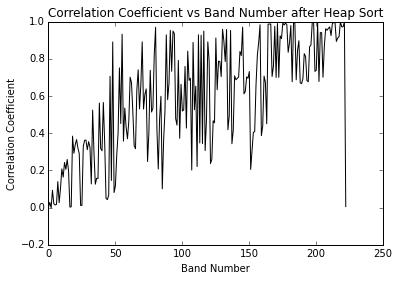

In [17]:
plt.figure(18)
plt.plot(range(0,223),corrheap, 'k')
plt.xlabel('Band Number')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient vs Band Number after Heap Sort')
plt.show()

In [18]:
mini = corr1.index(min(corr1))
print mini

75


In [19]:
rblock = []
block1 = [] #all blocks
block1 = block
rindex = [] #contains all index
ifin = []
ifin1 = []


rindex.append(mini)
rblock.append(block1[mini])

for gh in range(len(block)):
        ifin.append(gh) #ifin will conatin the number od indices
        
for jk in range(224): 
    corgoa = [] #conatins correlation of greedy ordering algorithm
    Ref = rindex[jk] #Ref will contain the last rindex    
    block1.pop(Ref) #Removes that index from the block
    yoyo = ifin.pop(Ref) # saves it to a temp variable yoyo
    ifin1.append(yoyo) #ifin1 will conatin the final rearranged indexes
    for ijk in range(len(block1)):
        corr2 = ssim(rblock[jk], block1[ijk]) #calculate correlation coefficient with respect to the reference block
        corgoa.append(corr2)
    if len(corgoa) !=0:
        indexi = corgoa.index(max(corgoa)) #indexi will contain the index of maximum correlation w.r.t to the rblock
        rblock.append(block1[indexi]) #add the corresponding block to the rblock
        rindex.append(indexi) 
    del(corgoa)
    del(Ref)
print "Process Complete"

Process Complete


In [20]:
corrfin = []
for i in range(223):
    corfin = ssim(rblock[i], rblock[i+1])
    corrfin.append(corfin)
print "process complete"

process complete


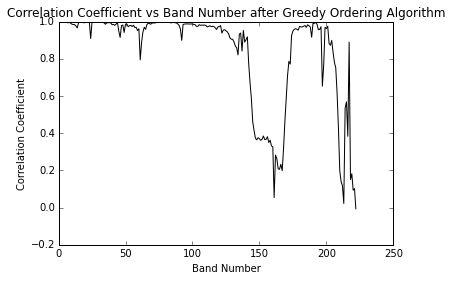

In [21]:
plt.figure(19)
plt.plot(range(0,223),corrfin, 'k')
plt.xlabel('Band Number')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient vs Band Number after Greedy Ordering Algorithm')
plt.show()

In [22]:
def msort4(x):
    result = []
    if len(x) < 20:
        return sorted(x)
    mid = int(len(x)/2)
    y = msort4(x[:mid])
    z = msort4(x[mid:])
    i = 0
    j = 0
    while i < len(y) and j < len(z):
            if y[i] > z[j]:
                result.append(z[j])
                j += 1
            else:
                result.append(y[i])
                i += 1
    result += y[i:]
    result += z[j:]
    return result

In [23]:
res123 = msort4(corr1)

In [24]:
indexi = []
for i in range(len(corr1)):
    ind = corr1.index(res123[i])
    indexi.append(ind)
print 'process complete'

process complete


In [25]:
block = []
for i in range(224):
    data = arr[:40,:40,i].astype(np.float32)*10000 
    block.append(data)

In [26]:
rblock = []
for i in range(len(indexi)):
    rblock.append(block[indexi[i]])
rblock.append(block[223])
print 'process complete'

process complete


In [28]:
corrmerge = []
for i in range(223):
    cor1 = ssim(rblock[i], rblock[i+1])
    corrmerge.append(cor1)
print corrmerge

[0.00069547404, 0.028469313, -0.0018109566, 0.093446009, 0.020895941, 0.014037934, 0.017452074, 0.13976122, 0.026558448, 0.1038117, 0.20807859, 0.16371891, 0.2428204, 0.20548305, 0.25886482, 0.19839388, 0.0027793294, 0.004449632, 0.38435575, 0.29220429, 0.33805504, 0.36580333, 0.32032487, 0.29032898, 0.011953606, 0.011550048, 0.32932442, 0.36200646, 0.36311162, 0.31115392, 0.35463658, 0.32494691, 0.12726079, 0.52422947, 0.29457566, 0.12570642, 0.15758494, 0.15666327, 0.56207299, 0.31792825, 0.30560011, 0.56514579, 0.3453739, 0.049979154, 0.042783573, 0.067530721, 0.70601088, 0.14589503, 0.89055699, 0.081065238, 0.1172629, 0.28267449, 0.40093204, 0.75121957, 0.45191205, 0.93214768, 0.35740989, 0.53538847, 0.43282369, 0.36996794, 0.46351033, 0.70091599, 0.67179465, 0.51738924, 0.33250847, 0.31678081, 0.63217956, 0.74084377, 0.53126413, 0.66106737, 0.89104277, 0.52982223, 0.60799116, 0.63803399, 0.2476356, 0.40415734, 0.73825198, 0.51389599, 0.53474498, 0.82099426, 0.96962774, 0.41791397,

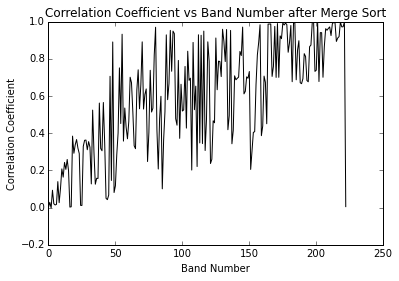

In [29]:
plt.figure(20)
plt.plot(range(0,223),corrmerge, 'k')
plt.xlabel('Band Number')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficient vs Band Number after Merge Sort')
plt.show()